In [4]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as transforms_functional
import skimage 
import numpy as np
import cv2
import kornia
from kornia.augmentation import RandomRotation, RandomHorizontalFlip, RandomVerticalFlip

In [2]:
# within container:

img_path = '/home/appuser/data/Pytorch-UNet/data/imgs/'
mask_path = '/home/appuser/data/Pytorch-UNet/data/masks/'

img = cv2.imread(img_path+"0546.tif",-1)
mask = cv2.imread(mask_path+"0546_mask.png",-1)

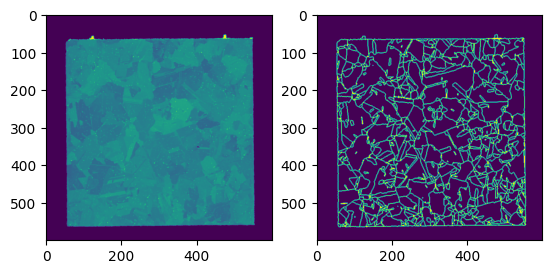

In [3]:
fig, axs = plt.subplots(1,2)
axs = axs.flatten()
axs[0].imshow(img)
axs[1].imshow(mask)

In [30]:
random_rot = RandomRotation(degrees=45,p=1,same_on_batch=True)

In [31]:
# The augmentations expects an image with shape BxCxHxW

In [32]:
print( img.dtype )
print( mask.dtype )
test = np.stack((img,mask)).astype(np.float32)

uint16
uint8


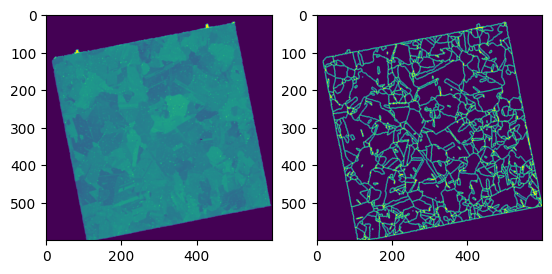

In [48]:
r_test = random_rot( torch.from_numpy(test ) )
fig, axs = plt.subplots(1,2)
axs.flatten()
axs[0].imshow( r_test.numpy()[0,0,:,:] )
axs[1].imshow( r_test.numpy()[0,1,:,:] )

In [93]:
aug_list = kornia.augmentation.AugmentationSequential(
                                                        RandomRotation(degrees=45,p=1),
                                                        RandomHorizontalFlip(p=0.5),
                                                        RandomVerticalFlip(p=0.5),
                                                        data_keys=["image",'mask'],
                                                        same_on_batch=True )

In [100]:
torch_img = torch.from_numpy(img.astype(np.float64)/(2**16-1))
print( torch_img.size() )
print( torch_img.dtype )

torch_mask = torch.from_numpy(mask)
print( torch_mask.size() )
print( torch_mask.dtype)

torch.Size([600, 600])
torch.float64
torch.Size([600, 600])
torch.uint8


In [96]:

r_test = aug_list( ) ,torch.from_numpy(mask.astype(np.float16)) )
fig, axs = plt.subplots(1,2)
axs.flatten()
axs[0].imshow( r_test.numpy()[0,0,:,:] )
axs[1].imshow( r_test.numpy()[0,1,:,:] )


RuntimeError: Expect (B, C, H, W). Got torch.Size([600, 600]).

## data_transform = transforms.Compose([
                                    transforms.RandomVerticalFlip(),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation()